# Exploratory Data Analysis

In this notebook, I'm performing some data analysis. Without resorting to more advanced methods, there is a lot to be learned from the dataframe we already have. Eventually, we'll bring in `CountVectorizer` to view word choice trends in the titles of posts from each subreddit.

**Jump to:**
- [Basic EDA](#basic)
- [EDA using CountVectorizer](#countvect)

## Importing libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer

## Loading the data

In [2]:
filepath = '../data/clean_1587672956.csv'
df = pd.read_csv(filepath)

In [3]:
df.head()

,subreddit,subreddit_subscribers,title,selftext,score,num_comments,author,created_utc
0,Christianity,233423,Christian and wondering if God provides what w...,"Please forgive me for sounding so flippant, bu...",1,0,friendlyhello123,1587672956
1,Christianity,233423,What do you think is often ignored in the bibl...,Like genealogies for example... both Rahab and...,1,0,Clear-Plastic,1587671298
2,Christianity,233422,How do you deal with some new member suddenly ...,Have this issue now. This member somehow becam...,1,0,akhil_gs,1587671035
3,Christianity,233423,"Ran Across a Great Podcast about Christianity,...","Hi all, \n\nI ran across this podcast where a ...",1,0,MrNewDenver,1587670810
4,Christianity,233423,Desire for wealth,Hi-\nI have been thinking about it a bit latel...,1,0,FloppingGazelle,1587670685


In [4]:
df.shape

(28735, 8)

# Basic EDA <a id="basic"></a>

### What percentage of posts in each community are made by someone new?

In [5]:
# Create masks to identify each subreddit
is_christianity_sub = df['subreddit'] == 'Christianity'
is_catholicism_sub = df['subreddit'] == 'Catholicism'

In [6]:
# Get number of posters on christianity sub
n_posters_christianity = len(df.loc[is_christianity_sub, 'author'].unique())

# Get number of posts on christianity sub
n_posts_christianity = df.loc[is_christianity_sub, :].shape[0]

In [7]:
# Get number of posters on catholicism sub
n_posters_catholicism = len(df.loc[is_catholicism_sub, 'author'].unique())

# Get number of posts on catholicism sub
n_posts_catholicism = df.loc[is_catholicism_sub, :].shape[0]

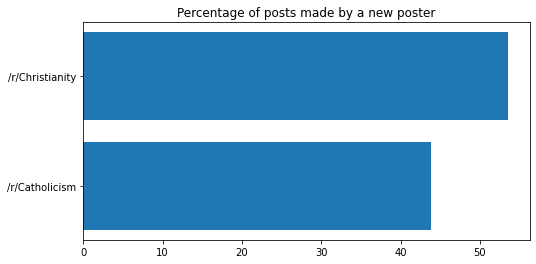

In [8]:
plt.figure(figsize=(8, 4))
plt.barh(y=['/r/Catholicism', '/r/Christianity'],
         width=[n_posters_catholicism / n_posts_catholicism * 100,
                n_posters_christianity / n_posts_christianity * 100])
plt.title('Percentage of posts made by a new poster');

We can see that for the Catholicism subreddit, about 45% of posts are made by someone who has not previously made a post in the community. For the Christianity subreddit, it's about 55%. So the Christianity subreddit is slightly more active with new voices. Regardless, about half of all discussion in either community is generated by regular posters.

### What is the average score and number of comments for a post in each community?

In [9]:
# Get average score of a post in christianity sub
avg_score_christianity = df.loc[is_christianity_sub, 'score'].mean()

# Get average score of a post in catholicism sub
avg_score_catholicism = df.loc[is_catholicism_sub, 'score'].mean()

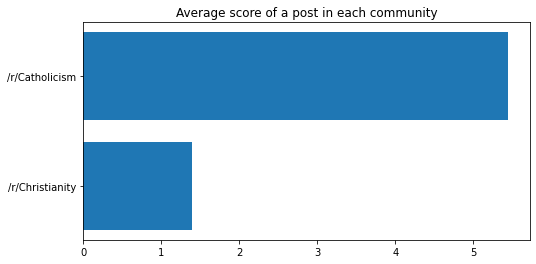

In [10]:
plt.figure(figsize=(8, 4))
plt.barh(y=['/r/Christianity', '/r/Catholicism'],
          width=[avg_score_christianity, avg_score_catholicism])
plt.title('Average score of a post in each community');

In [11]:
# Get average number of comments for a post in christianity sub
avg_n_comments_christianity = df.loc[is_christianity_sub, 'num_comments'].mean()

# Get average number of comments for a post in catholicism sub
avg_n_comments_catholicism = df.loc[is_catholicism_sub, 'num_comments'].mean()

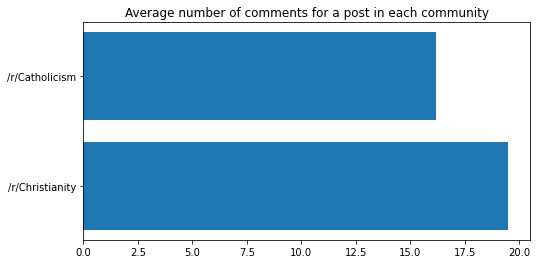

In [12]:
plt.figure(figsize=(8, 4))
plt.barh(y=['/r/Christianity', '/r/Catholicism'],
         width=[avg_n_comments_christianity, avg_n_comments_catholicism])
plt.title('Average number of comments for a post in each community');

We see that while posts in */r/Catholicism* on average receive a higher score, they do not on average get as many comments. This suggests the preferred method of interaction is commenting for */r/Christianity* and upvoting/downvoting for */r/Catholicism*.

### Does anyone post in both subreddits?

I began this project by making the assumption that Protestants and Catholics mostly self-segregate into */r/Christianity* and */r/Catholicism*, respectively. We can use the `author` tag from our posts to check if this assumption is valid.

In [13]:
# Get posters in christianity subreddit
christianity_posters = [author for author in df.loc[is_christianity_sub, 'author'].unique()]

# Get posters in catholicism subreddit
catholicism_posters = [author for author in df.loc[is_catholicism_sub, 'author'].unique()]

# Get posters in both subreddits
both = [author for author in christianity_posters if author in catholicism_posters]

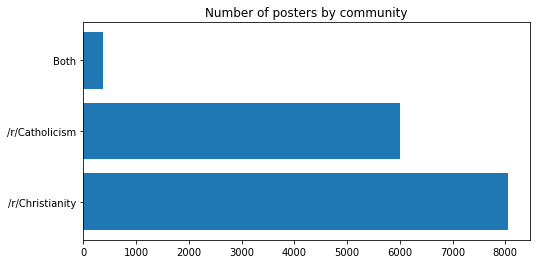

In [14]:
plt.figure(figsize=(8, 4))
plt.barh(y=['/r/Christianity', '/r/Catholicism', 'Both'],
         width=[len(christianity_posters), len(catholicism_posters), len(both)])
plt.title('Number of posters by community');

So, we see that less than 500 of the almost 14,000 posters (~ 3%) have made submissions in both communities. This seems to confirm my intuition that the two subreddits are divided along ideological lines.

# EDA Using `CountVectorizer` <a id="countvect"></a>

Now that we've done some basic EDA, we'll create a dataframe of title word counts to dig a little deeper.

In [15]:
# Instantiate a CountVectorizer
cvec = CountVectorizer(stop_words='english')

In [16]:
# Fit the vectorizer on our title data and get word counts
title_words = cvec.fit_transform(df['title'])

In [17]:
# Create a dataframe out of the title words
title_words_df = pd.DataFrame(title_words.toarray(), columns=cvec.get_feature_names())

In [18]:
# Add back in the subreddit the post came from
title_words_df['subreddit'] = df['subreddit']

### Which words are most common overall?

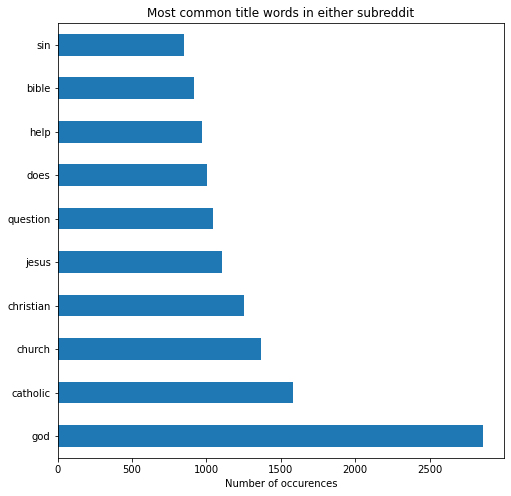

In [19]:
plt.figure(figsize=(8, 8))
title_words_df.drop(columns=['subreddit']).sum().sort_values(ascending=False)[:10].plot(kind='barh')
plt.xlabel('Number of occurences')
plt.title('Most common title words in either subreddit');

### Which words are most common in the Christianity subreddit?

In [20]:
# Create dataframe of all title words in Christianity subreddit
christianity_title_words_df = title_words_df.loc[is_christianity_sub, title_words_df.columns != 'subreddit']

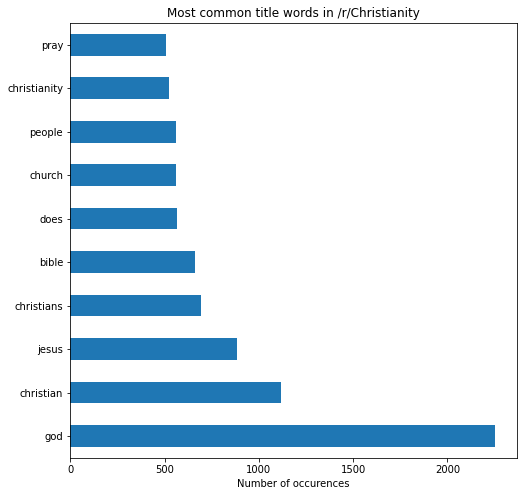

In [21]:
plt.figure(figsize=(8, 8))
christianity_title_words_df.sum().sort_values(ascending=False)[:10].plot(kind='barh')
plt.xlabel('Number of occurences')
plt.title('Most common title words in /r/Christianity');

### Which words are most common in the Catholicism subreddit?

In [22]:
# Create dataframe of all title words in Christianity subreddit
catholicism_title_words_df = title_words_df.loc[is_catholicism_sub, title_words_df.columns != 'subreddit']

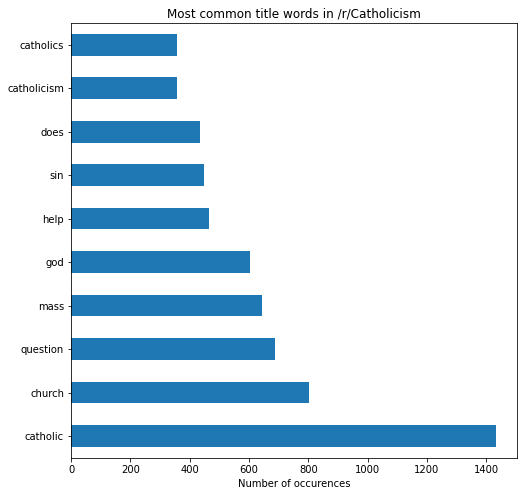

In [23]:
plt.figure(figsize=(8, 8))
catholicism_title_words_df.sum().sort_values(ascending=False)[:10].plot(kind='barh')
plt.xlabel('Number of occurences')
plt.title('Most common title words in /r/Catholicism');

### Which words are common in one subreddit but not the other?

In [24]:
# Get 50 most common words in Christianity sub
sorted_christianity_word_counts = christianity_title_words_df.sum().sort_values(ascending=False)
most_common_christianity_words = [word for word in christianity_title_words_df.columns if word in sorted_christianity_word_counts[:50]]

# Get 50 most common words in Catholicism sub
sorted_catholicism_word_counts = catholicism_title_words_df.sum().sort_values(ascending=False)
most_common_catholicism_words = [word for word in catholicism_title_words_df.columns if word in sorted_catholicism_word_counts[:50]]

|   | Common in /r/Christianity but not /r/Catholicism | Common in /r/Catholicism but not /r/Christianity |
|---|--------------------------------------------------|--------------------------------------------------|
|   | atheist                                          | book                                             |
|   | believe                                          | catholic                                         |
|   |  christ                                          | catholicism                                      |
|   | christian                                        | catholics                                        |
|   | christianity                                     | communion                                        |
|   | coronavirus                                      | confession                                       |
|   | feel                                             | day                                              |
|   | going                                            | free                                             |
|   | heaven                                           | friday                                           |
|   | hell                                             | holy                                             |
|   | lord                                             | looking                                          |
|   | love                                             | mary                                             |
|   | make                                             | mass                                             |
|   | read                                             | mortal                                           |